In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from helpers import *
from preprocessing import *

In [2]:
dataset = load_csv_data("./dataset")
with open("./dataset/x_test.csv") as file:
    HEADER = file.readline().strip().split(",")[1:]

In [ ]:
calculated_features = ["_RFHLTH","_HCVU651","_RFHYPE5","_CHOLCHK","_RFCHOL","_LTASTH1","_CASTHM1","_ASTHMS1","_DRDXAR1","_PRACE1","_MRACE1","_HISPANC","_RACE","_RACEG21","_RACEGR3","_RACE_G1","_AGEG5YR","_AGE65YR","_AGE80","_AGE_G","HTIN4","HTM4","WTKG3","_BMI5","_BMI5CAT","_RFBMI5","_EDUCAG","_INCOMG","_SMOKER3","_RFSMOK3","DRNKANY5","DROCDY3_","_RFBING5","_DRNKWEK","_RFDRHV5","FTJUDA1_","FRUTDA1_","BEANDAY_","GRENDAY_","ORNGDAY_","VEGEDA1_","_FRUTSUM","_VEGESUM","_FRTLT1","_VEGLT1","_FRT16","_VEG23","_FRUITEX","_VEGETEX","_TOTINDA","METVL11_","METVL21_","MAXVO2_","FC60_","ACTIN11_","ACTIN21_","PADUR1_","PADUR2_","PAFREQ1_","PAFREQ2_","_MINAC11","_MINAC21","STRFREQ_","PAMISS1_","PAMIN11_","PAMIN21_","PA1MIN_","PAVIG11_","PAVIG21_","PA1VIGM_","_PACAT1","_PAINDX1","_PA150R2","_PA300R2","_PA30021","_PASTRNG","_PAREC1","_PASTAE1","_LMTACT1","_LMTWRK1","_LMTSCL1","_RFSEAT2","_RFSEAT3","_FLSHOT6","_PNEUMO2","_AIDTST3"]
# include some non-calculated features which we believe are influential for the forecasting
raw_features = ["STREHAB1", "RDUCHART", "HAREHAB1","SEX","DIABETE3","DRADVISE"]
raw_and_calculated_features = calculated_features + raw_features

# features which will be given value NaN
# for instance, in list 'null_i_j', 'i' and 'j' will become NaN
null_9 = ["_RFHLTH","_HCVU651","_RFHYPE5","_CHOLCHK","_RFCHOL","_LTASTH1","_CASTHM1","_ASTHMS1","_HISPANC","_RACE","_RACEG21","_RACEGR3","_RFBMI5","_CHLDCNT","_EDUCAG","_INCOMG","_SMOKER3","_RFSMOK3","_RFBING5","_RFDRHV5","_FRTLT1","_VEGLT1","_TOTINDA","PAMISS1_","_PACAT1","_PAINDX1","_PA150R2","_PA300R2","_PA30021","_PASTRNG","_PAREC1","_PASTAE1","_LMTACT1","_LMTWRK1","_LMTSCL1","_RFSEAT2","_RFSEAT3","_FLSHOT6","_PNEUMO2","_AIDTST3"]
null_77_99 = ["_PRACE1","_MRACE1"]
null_14 = ["_AGEG5YR"]
null_3 = ["_AGE65YR"]
null_99999 = ["WTKG3"]
null_99900 = ["_DRNKWEK","MAXVO2_","FC60_","PAFREQ1_","PAFREQ2_"]
null_99000 = ["STRFREQ_"]
null_7_9 = ["DRNKANY5","DIABETE3","HAREHAB1","STREHAB1","ADANXEV","DRADVISE"]
null_900 = ["DROCDY3_"]

columns_null_list = [null_9,null_77_99,null_14,null_3,null_99999,null_99900,null_99000,null_7_9,null_900]
values_null_list = [[9],[77,99],[14],[3],[99999],[99900],[99000],[7,9],[900]]

binary_list = ["SEX","_RFHLTH","_HCVU651","_RFHYPE5","_RFCHOL","_LTASTH1","_CASTHM1","_RACEG21","_AGE65YR","_RFBMI5","_RFSMOK3","_RFBING5","_RFDRHV5","_FRTLT1","_VEGLT1","_FRUITEX","_VEGETEX","_TOTINDA","PAMISS1_","_PAINDX1","_PASTRNG","_PASTAE1","_RFSEAT2","_RFSEAT3","_FLSHOT6","_PNEUMO2","_AIDTST3"]
binary_reverse_list = ["_DRDXAR1","_HISPANC","DRNKANY5","_FRTRESP","_VEGRESP","_FRT16","_VEG23","RDUCHART","DRADVISE","ADANXEV"]
one_hot_encoding_list = ["_CHOLCHK","_ASTHMS1","_PRACE1","_MRACE1","_RACE","_RACEGR3","_RACE_G1","_AGEG5YR","_AGE80","_SMOKER3","_PAREC1","_LMTACT1","_LMTWRK1","_LMTSCL1"]
categorical_label_list = ["_AGE_G","_BMI5CAT","_CHLDCNT","_EDUCAG","_INCOMG","ACTIN11_","ACTIN21_"]
reverse_categorical_label_list = ["_PACAT1","_PA150R2","_PA300R2","_PA30021"]
num_list = ["HTIN4","HTM4","WTKG3","_BMI5","DROCDY3_","_DRNKWEK","FTJUDA1_","FRUTDA1_","BEANDAY_","GRENDAY_","ORNGDAY_","VEGEDA1_","_MISFRTN","_MISVEGN","_FRUTSUM","_VEGESUM","METVL11_","METVL21_","MAXVO2_","FC60_","PADUR1_","PADUR2_","PAFREQ1_","PAFREQ2_","_MINAC11","_MINAC21","STRFREQ_","PAMIN11_","PAMIN21_","PA1MIN_","PAVIG11_","PAVIG21_","PA1VIGM_"]

In [ ]:
x_train, x_test, y_train, _, _ = dataset
x_train_selected = select_features(x_train, raw_and_calculated_features, HEADER)

# pre-processing
preprocess_null_dataset(x_train_selected, values_null_list, columns_null_list, raw_and_calculated_features)
process_diab(x_train_selected,"DIABETE3",raw_and_calculated_features)
process_rehab(x_train_selected,"HAREHAB1",raw_and_calculated_features)
process_rehab(x_train_selected,"STREHAB1",raw_and_calculated_features)

#Handling specific sparse features affecting only a given category of the population
features_fill_nans = ["_FLSHOT6","_PNEUMO2","DRADVISE","RDUCHART"]
columns_fill_nans = [raw_and_calculated_features.index(feature) for feature in features_fill_nans]
x_train_selected[:,columns_fill_nans] = np.where(np.isnan(x_train_selected[:,columns_fill_nans]),0,x_train_selected[:,columns_fill_nans])

In [ ]:
# positive cases

total_posi = (y_train == 1).sum()
total_nega = (y_train == -1).sum()
total_cases = y_train.shape[0]
print(f"There are {100*total_posi/total_cases}% of positive cases out of the {total_cases} total cases")

There are 8.830207079403294% of positive cases out of the 328135 total cases


In [ ]:
# drop features which have more than 25% of NaNs

features_to_drop = []
for feature_idx, feature in enumerate(raw_and_calculated_features):
    x_feature = x_train_selected[:,feature_idx]
    blank_values = np.isnan(x_train_selected[:,feature_idx]).sum()
    total_values = len(x_feature)
    if 100*blank_values/total_values >= 25:
        features_to_drop.append(feature)
        print(f"| There are {blank_values} NaNs for feature {feature} which is {100*blank_values/total_values}% of the total values |")

| There are 117708 NaNs for feature _HCVU651 which is 35.87182104926326% of the total values |
| There are 108727 NaNs for feature METVL11_ which is 33.13483779541957% of the total values |
| There are 112425 NaNs for feature METVL21_ which is 34.26181297331891% of the total values |
| There are 111072 NaNs for feature ACTIN11_ which is 33.84948268243254% of the total values |
| There are 114698 NaNs for feature ACTIN21_ which is 34.95451567190333% of the total values |
| There are 113793 NaNs for feature PADUR1_ which is 34.678714553461226% of the total values |
| There are 184643 NaNs for feature PADUR2_ which is 56.27043747238179% of the total values |
| There are 111257 NaNs for feature PAFREQ1_ which is 33.90586191658921% of the total values |
| There are 182913 NaNs for feature PAFREQ2_ which is 55.743215444862635% of the total values |
| There are 115152 NaNs for feature _MINAC11 which is 35.09287336004998% of the total values |
| There are 116821 NaNs for feature _MINAC21 which

In [ ]:
columns_drop_idx = [raw_and_calculated_features.index(feature) for feature in features_to_drop if feature in raw_and_calculated_features]
# drop features raw_and_calculated_features if they are in features_to_drop
x_train_selected = np.delete(x_train_selected,columns_drop_idx,axis=1)
for feature in features_to_drop:
    if feature in raw_and_calculated_features:
        raw_and_calculated_features.pop(raw_and_calculated_features.index(feature))

# add mode and mean to categorical and numerical respectively
filling_nan_num(x_train_selected, num_list, raw_and_calculated_features)
filling_nan_cat(x_train_selected, binary_list + binary_reverse_list + categorical_label_list + reverse_categorical_label_list + one_hot_encoding_list, raw_and_calculated_features)

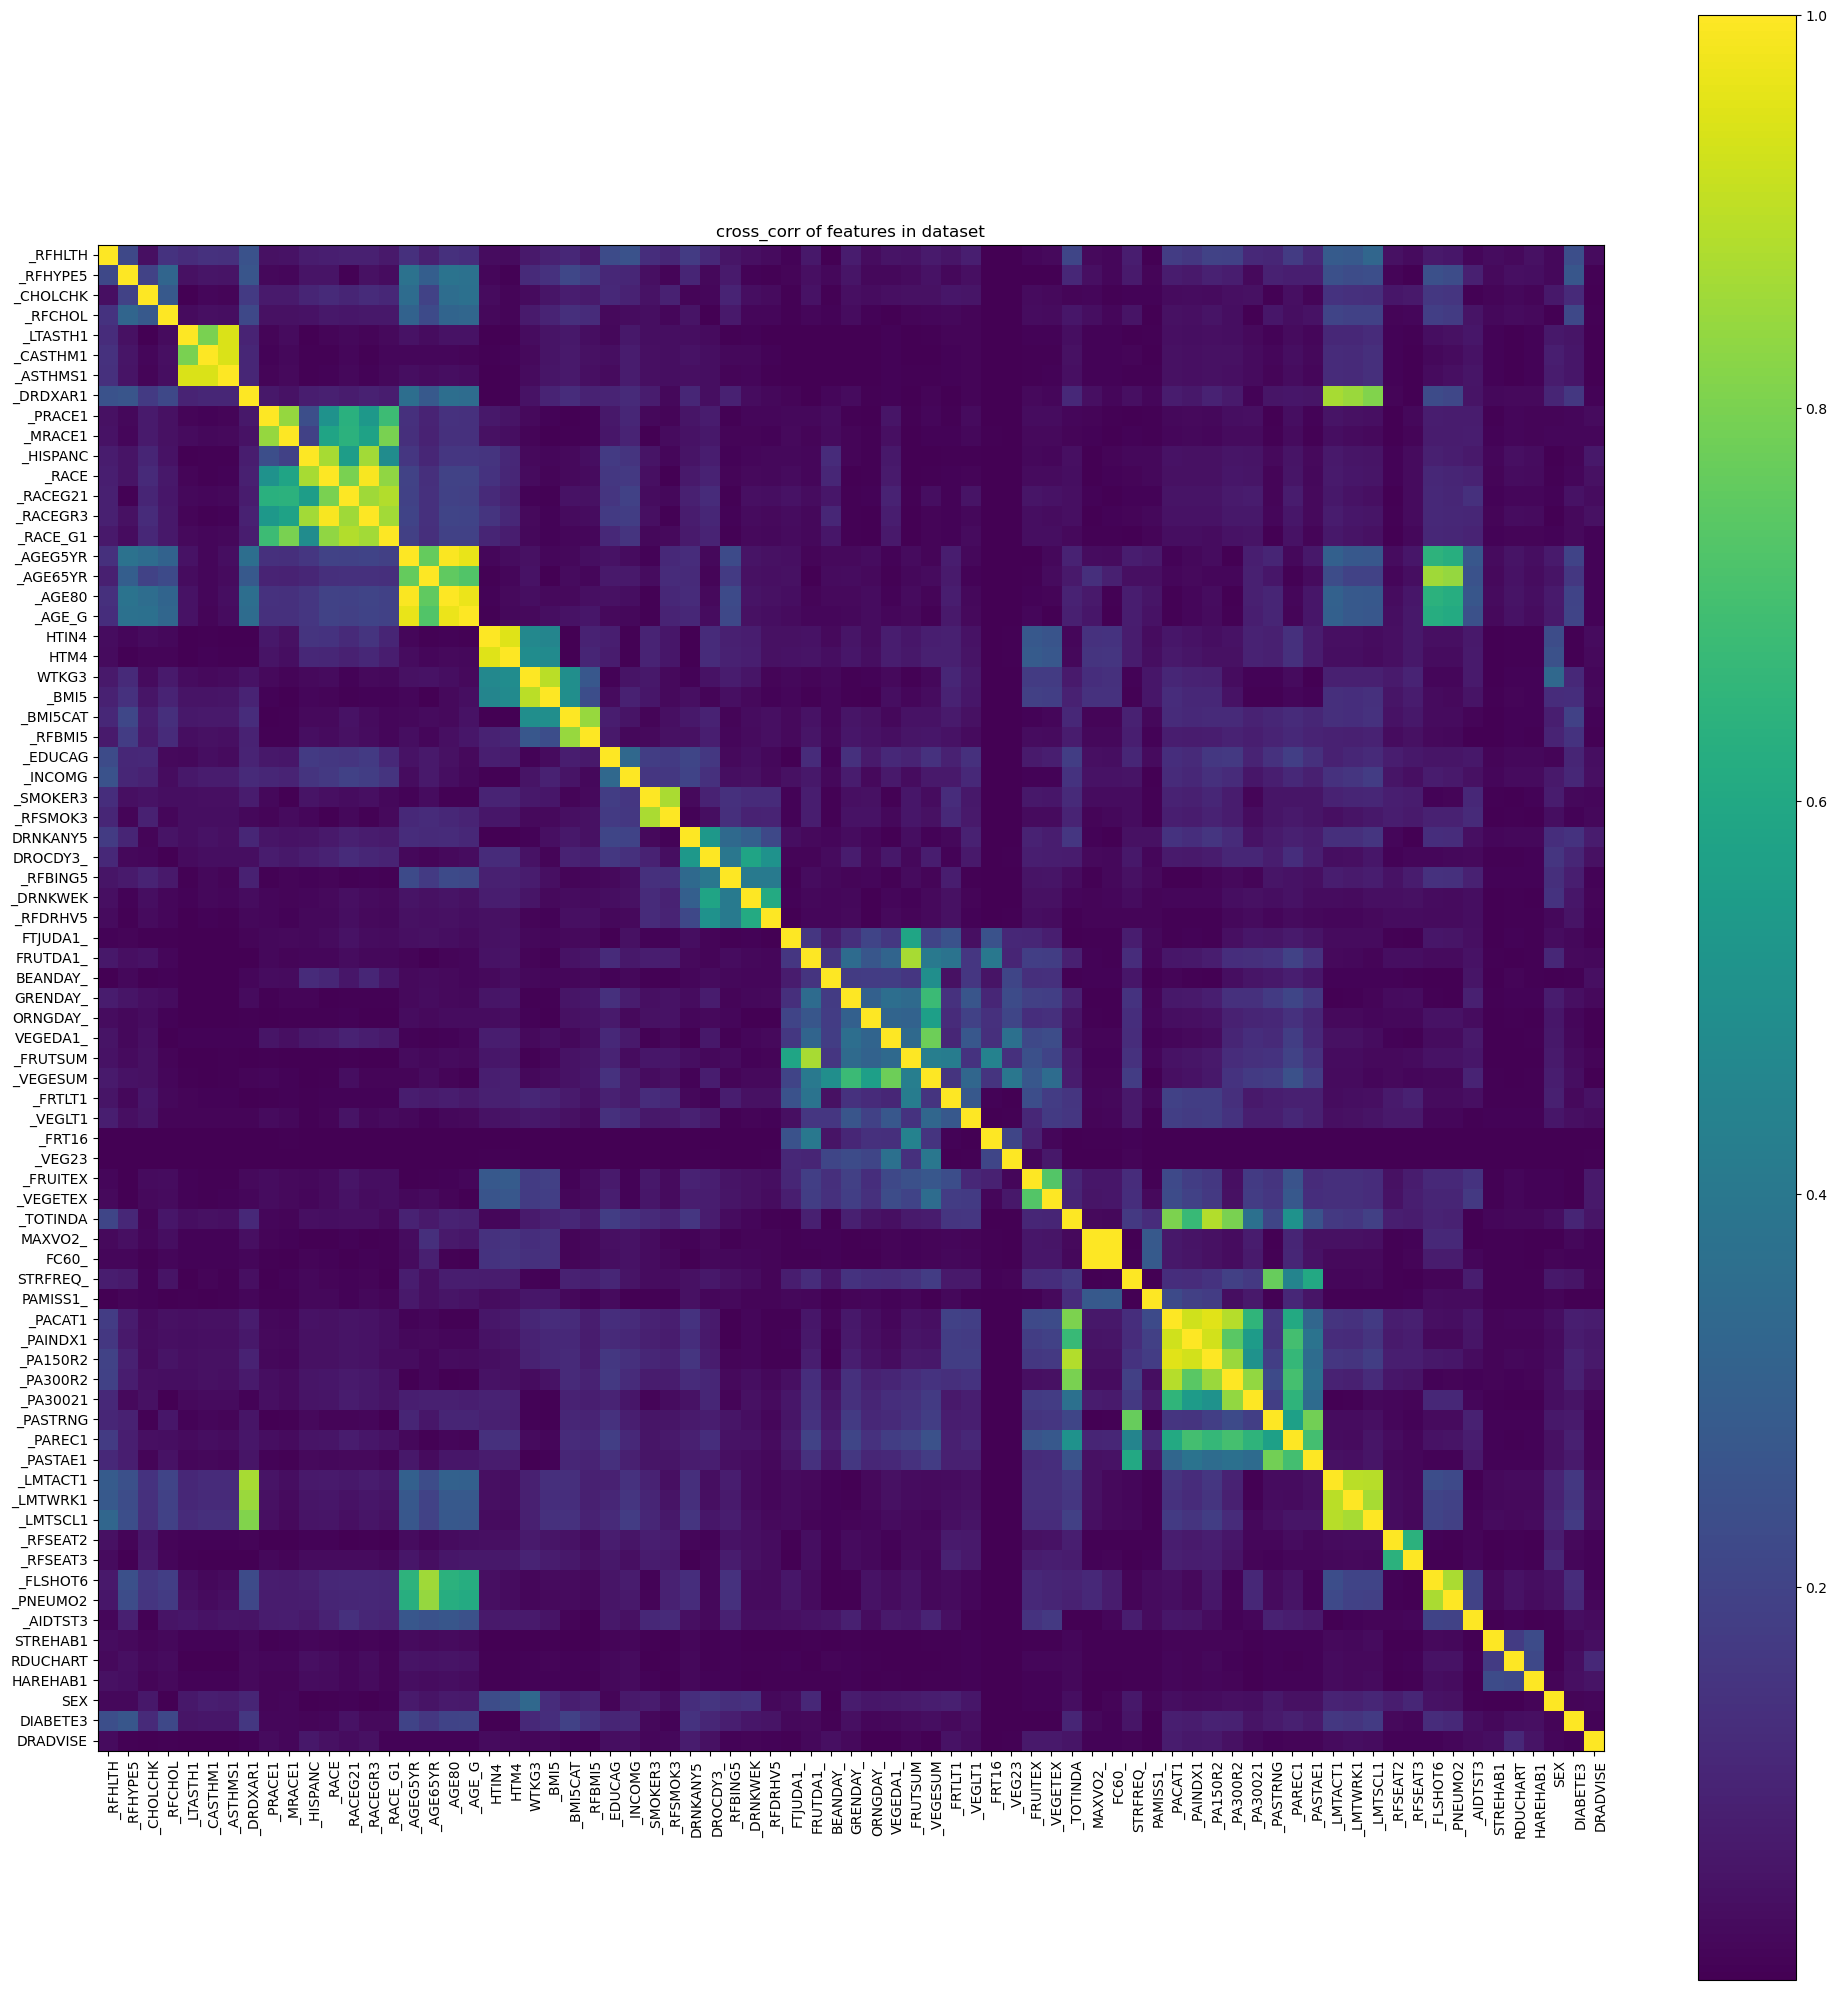

In [39]:
correlation_matrix = show_cross_corr(x_train_selected, raw_and_calculated_features)

In [ ]:
#Sets of correlated features (---> MANUALLY DONE <----)
asthma_features = ["_LTASTH1","_CASTHM1","_ASTHMS1"]
arthritis_features = ["_DRDXAR1","_LMTACT1","_LMTWRK1","_LMTSCL1"]
race_features = ["_PRACE1","_MRACE1","_RACE","_RACEG21","_RACEGR3","_RACE_G1","_HISPANC"]
age_features = ["_AGEG5YR","_AGE65YR","_AGE80","_AGE_G"] #Also linked to vaccine features and physical condition features
body_features = ["HTIN4","HTM4","WTKG3","_BMI5","_BMI5CAT","_RFBMI5"]
smoker_features = ["_SMOKER3","_RFSMOK3"]
alcohol_features_1 = ["DRNKANY5","DROCDY3_"]
alcohol_features_2 = ["DROCDY3_","_DRNKWEK","_RFDRHV5"]
physical_exercise_features_1 = ["_TOTINDA","_PACAT1","_PAINDX1","_PA150R2","_PA300R2","_PA30021","_PAREC1","_PASTAE1"]
physical_exercise_features_2 = ["STRFREQ_","_PASTRNG","_PAREC1","_PASTAE1"]
fruit_features = ["FTJUDA1_","FRUTDA1_","_FRUTSUM","_FRTLT1","_FRT16","_FRUITEX"]
vegetables_features = ["BEANDAY_","GRENDAY_","ORNGDAY_","VEGEDA1_","_VEGESUM","_VEGLT1","_VEG23"]
seatbelt_features = ["_RFSEAT2","_RFSEAT3"]
vaccine_features = ["_FLSHOT6","_PNEUMO2"] #Also linked to age features and physical condition features
physical_condition_features = ["MAXVO2_","FC60_"]
rehab_features = ["STREHAB1","RDUCHART","HAREHAB1"]
social_situation_features = ["_EDUCAG","_INCOMG"]

In [41]:
features_drop = ["_PRACE1","_MRACE1","_RACE","_RACEG21","_RACEGR3","_HISPANC","_LTASTH1","_CASTHM1","_LMTACT1","_LMTWRK1","_LMTSCL1","_AGEG5YR","_AGE65YR","_AGE80","HTIN4","WTKG3","_BMI5","_RFBMI5","_SMOKER3","MAXVO2_","_RFSEAT2","FTJUDA1_","FRUTDA1_","_FRT16","_FRUITEX","BEANDAY_","GRENDAY_","ORNGDAY_","VEGEDA1_","_VEG23","_TOTINDA","_PAINDX1","_PA150R2","_PA300R2","_PA30021","_PASTAE1","_EDUCAG","RDUCHART","STREHAB1"]

In [42]:
for feature in features_drop:
    raw_and_calculated_features.pop(raw_and_calculated_features.index(feature))

In [43]:
raw_and_calculated_features

['_RFHLTH',
 '_RFHYPE5',
 '_CHOLCHK',
 '_RFCHOL',
 '_ASTHMS1',
 '_DRDXAR1',
 '_RACE_G1',
 '_AGE_G',
 'HTM4',
 '_BMI5CAT',
 '_INCOMG',
 '_RFSMOK3',
 'DRNKANY5',
 'DROCDY3_',
 '_RFBING5',
 '_DRNKWEK',
 '_RFDRHV5',
 '_FRUTSUM',
 '_VEGESUM',
 '_FRTLT1',
 '_VEGLT1',
 '_VEGETEX',
 'FC60_',
 'STRFREQ_',
 'PAMISS1_',
 '_PACAT1',
 '_PASTRNG',
 '_PAREC1',
 '_RFSEAT3',
 '_FLSHOT6',
 '_PNEUMO2',
 '_AIDTST3',
 'HAREHAB1',
 'SEX',
 'DIABETE3',
 'DRADVISE']

In [ ]:
x_train, x_test, y_train, _, _ = dataset
x_train_selected = select_features(x_train, raw_and_calculated_features, HEADER)

# pre-processing
preprocess_null_dataset(x_train_selected, values_null_list, columns_null_list, raw_and_calculated_features)
process_diab(x_train_selected, "DIABETE3", raw_and_calculated_features)
process_rehab(x_train_selected, "HAREHAB1", raw_and_calculated_features)

# replacate missing data with 0
features_fill_nans = ["_FLSHOT6", "_PNEUMO2"]
columns_fill_nans = [
    raw_and_calculated_features.index(feature) for feature in features_fill_nans
]
x_train_selected[:, columns_fill_nans] = np.where(
    np.isnan(x_train_selected[:, columns_fill_nans]), 0, x_train_selected[:, columns_fill_nans]
)


# add mode and mean to categorical and numerical respectively
filling_nan_num(x_train_selected, num_list, raw_and_calculated_features)
filling_nan_cat(
    x_train_selected,
    binary_list
    + binary_reverse_list
    + categorical_label_list
    + reverse_categorical_label_list
    + one_hot_encoding_list,
    raw_and_calculated_features,
)

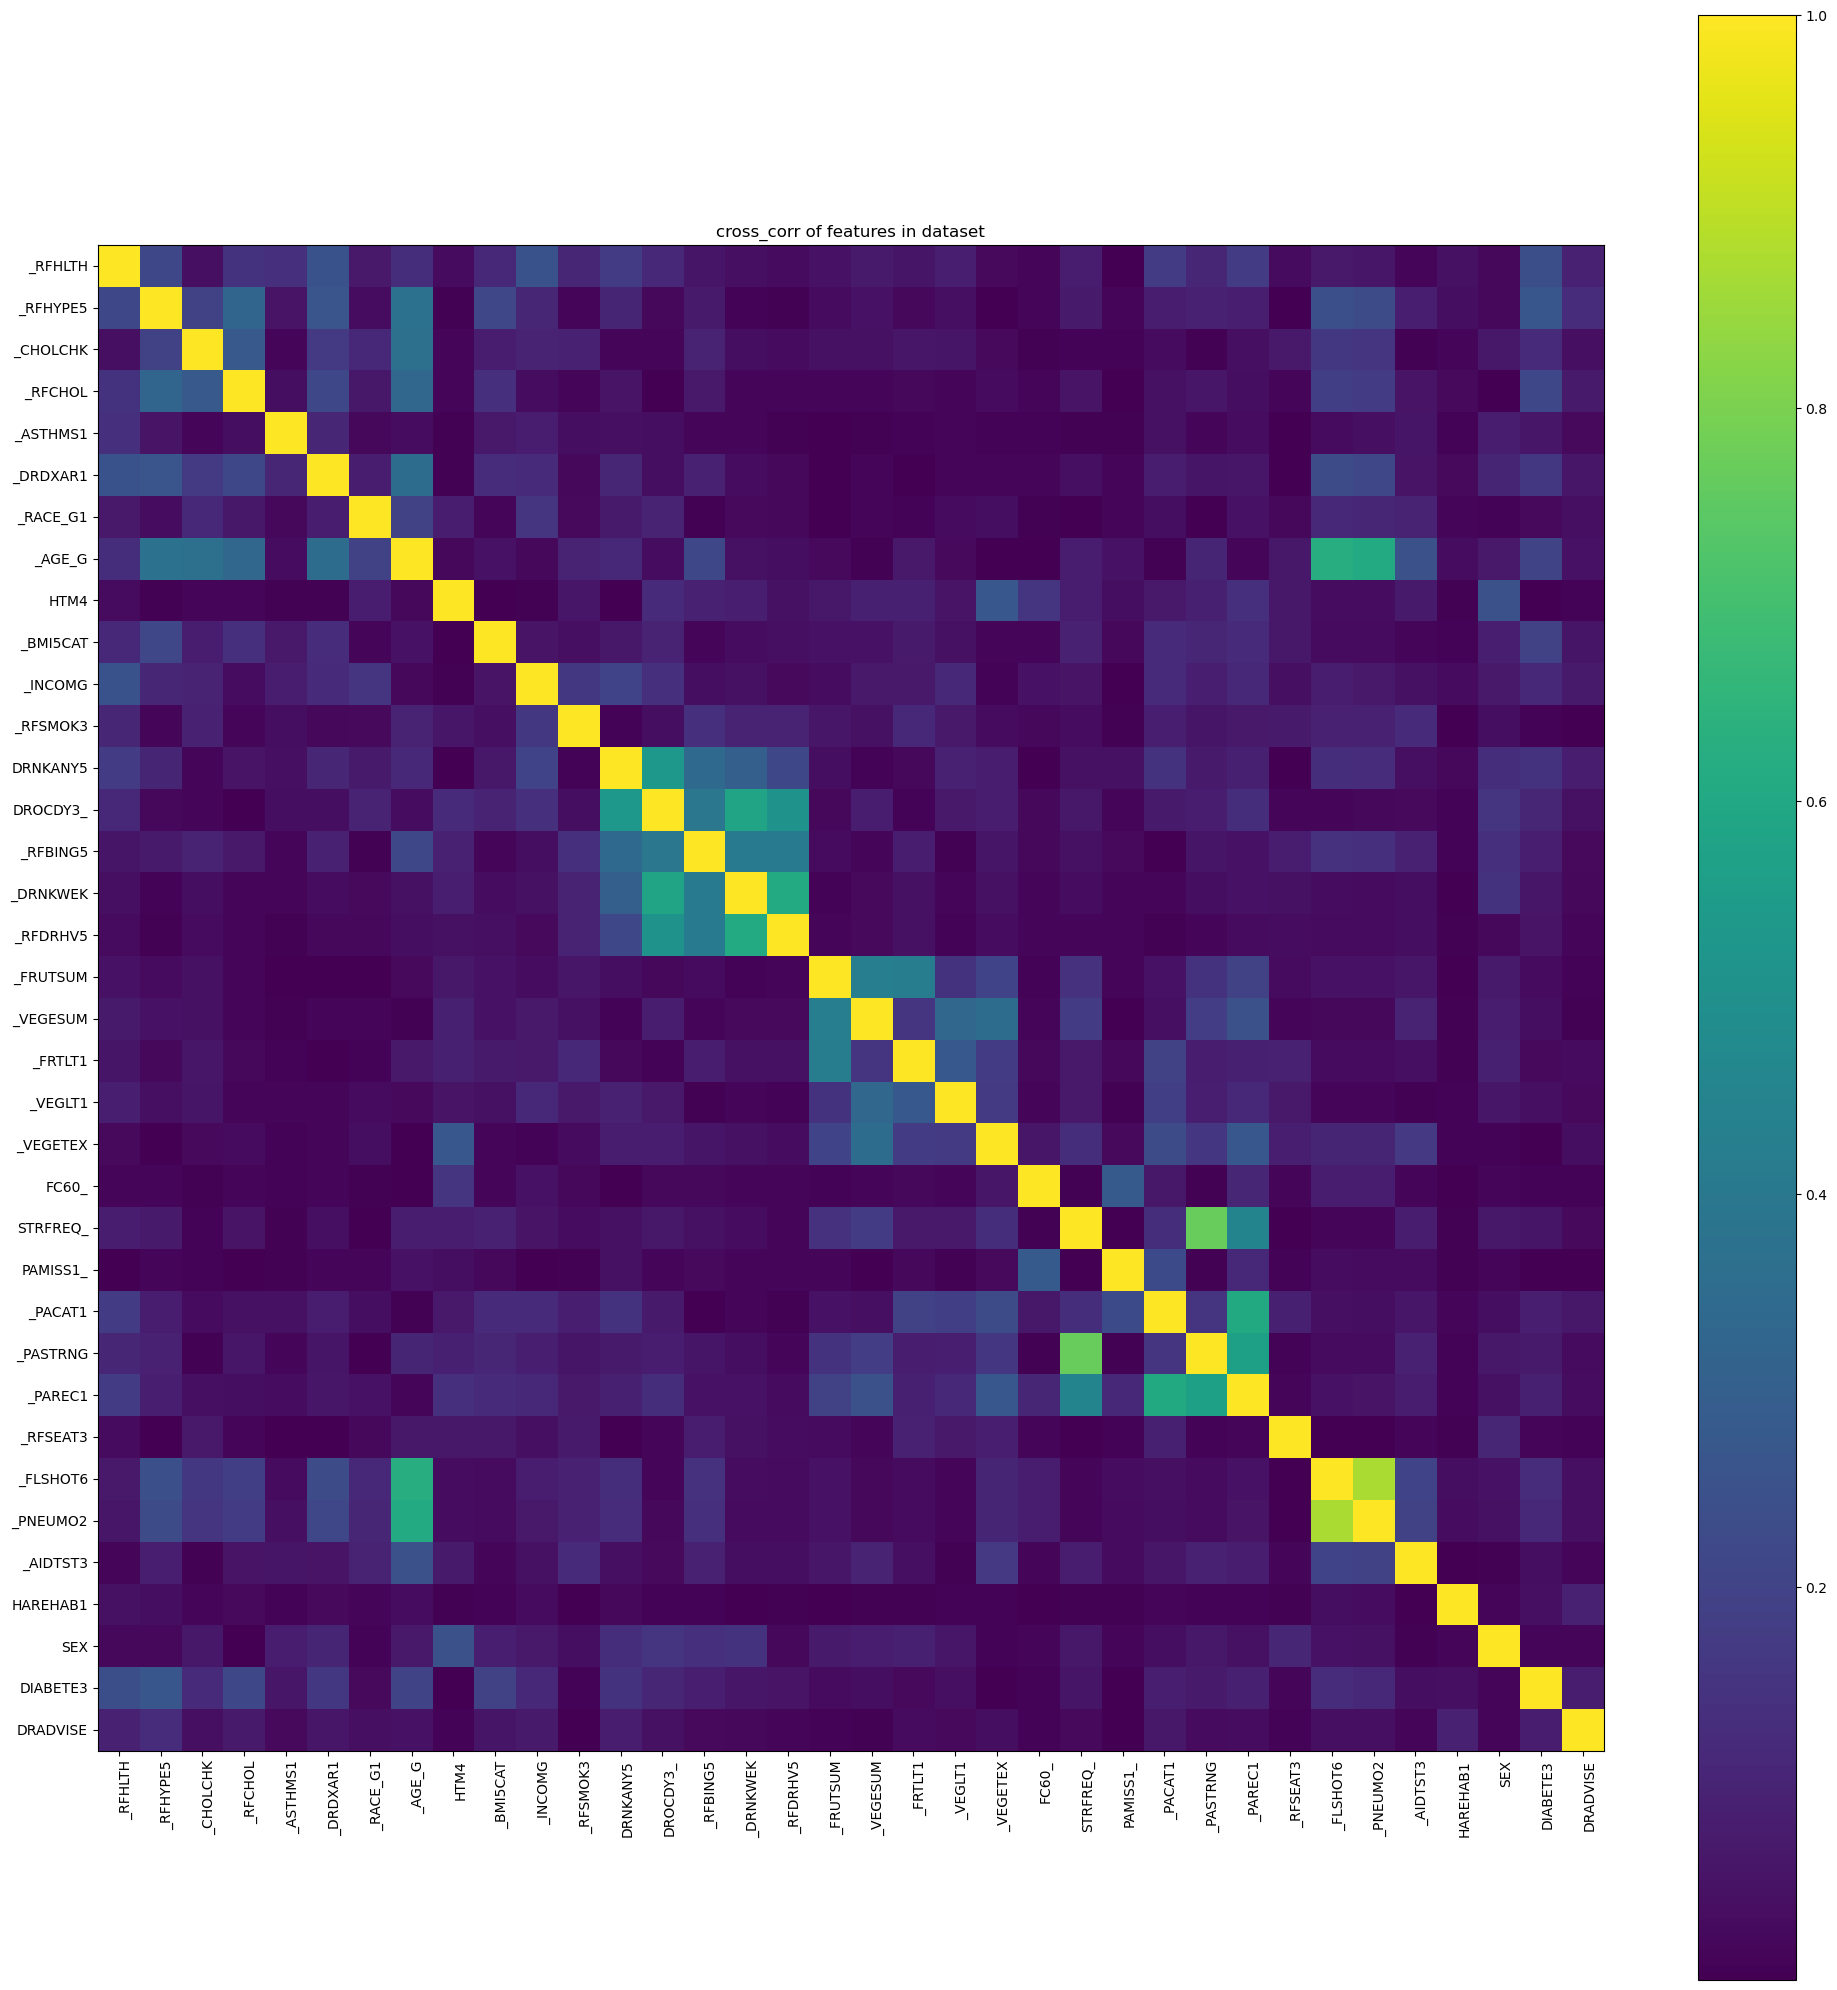

In [45]:
correlation_matrix = show_cross_corr(x_train_selected, raw_and_calculated_features)

At the end, we end up with 36 features.

Some correlated features have been kept when they are not conveying a similar aspect